#### Fantasy Basketball 2020 Draft Guide Pt. 2

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('Fantasy_Bball_Top_50%.csv')

In [3]:
df.head()

,Unnamed: 0,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per
0,0,Aaron Gordon,PF,24,62,32.5,5.4,12.4,0.437,1.2,2.4,3.6,0.674,7.7,3.7,0.8,0.6,1.6,14.4,20,1,0.322581,0.016129
1,1,Aaron Holiday,PG,23,66,24.5,3.5,8.5,0.414,1.3,1.1,1.3,0.851,2.4,3.4,0.8,0.2,1.3,9.5,3,0,0.045455,0.000000
2,5,Al Horford,C,33,67,30.2,4.8,10.6,0.450,1.5,0.9,1.2,0.763,6.8,4.0,0.8,0.9,1.2,11.9,6,0,0.089552,0.000000
3,7,Alec Burks,SF,28,66,26.6,4.9,11.6,0.418,1.8,3.6,4.0,0.887,4.3,2.9,0.9,0.3,1.4,15.0,1,0,0.015152,0.000000
4,10,Alex Len,C,26,55,17.6,3.2,5.8,0.555,0.3,1.2,1.9,0.648,5.8,0.9,0.4,0.9,1.0,8.0,8,0,0.145455,0.000000


In [4]:
pd.options.display.float_format = "{:,.2f}".format

In [5]:
df.head()

,Unnamed: 0,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per
0,0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02
1,1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00
2,5,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00
3,7,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00
4,10,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00


In [6]:
del df['Unnamed: 0']

In [7]:
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00


## EDA and Feature Engineering

### FG%

In [8]:
df['FG%'].describe()

count   263.00
mean      0.47
std       0.06
min       0.35
25%       0.43
50%       0.45
75%       0.49
max       0.74
Name: FG%, dtype: float64

In [9]:
df['FG%'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.54,0.08,0.40,0.47,0.53,0.60,0.74
PF,55.00,0.47,0.05,0.35,0.44,0.46,0.49,0.62
PG,53.00,0.44,0.04,0.38,0.42,0.44,0.47,0.58
SF,48.00,0.46,0.05,0.35,0.44,0.45,0.49,0.60
SG,60.00,0.44,0.03,0.38,0.42,0.44,0.46,0.49


In [10]:
#Create FG% tier overall feature
# create a list of our conditions
conditions = [
    (df['FG%'] >= .49),
    (df['FG%'] < .49) & (df['FG%'] >=.45),
    (df['FG%'] < .45) & (df['FG%'] >=.43),
    (df['FG%'] < .43)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FG_Tier'] = np.select(conditions, values)


In [11]:
#Create FG% tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') & (df['FG%'] >= .60),
    (df['Pos'] == 'C') & (df['FG%'] < .60) & (df['FG%'] >= .53),
    (df['Pos'] == 'C') & (df['FG%'] < .53) & (df['FG%'] >= .47),
    (df['Pos'] == 'C') & (df['FG%'] < .47),
    (df['Pos'] == 'PF') & (df['FG%'] >= .49),
    (df['Pos'] == 'PF') & (df['FG%'] < .49) & (df['FG%'] >= .46),
    (df['Pos'] == 'PF') & (df['FG%'] < .46) & (df['FG%'] >= .44),
    (df['Pos'] == 'PF') & (df['FG%'] < .44),
    (df['Pos'] == 'SF') & (df['FG%'] >= .49),
    (df['Pos'] == 'SF') & (df['FG%'] < .49) & (df['FG%'] >= .45),
    (df['Pos'] == 'SF') & (df['FG%'] < .45) & (df['FG%'] >= .44),
    (df['Pos'] == 'SF') & (df['FG%'] < .44),
    (df['Pos'] == 'SG') & (df['FG%'] >= .46),
    (df['Pos'] == 'SG') & (df['FG%'] < .46) & (df['FG%'] >= .44),
    (df['Pos'] == 'SG') & (df['FG%'] < .44) & (df['FG%'] >= .42),
    (df['Pos'] == 'SG') & (df['FG%'] < .42),
    (df['Pos'] == 'PG') & (df['FG%'] >= .47),
    (df['Pos'] == 'PG') & (df['FG%'] < .47) & (df['FG%'] >= .44),
    (df['Pos'] == 'PG') & (df['FG%'] < .44) & (df['FG%'] >= .42),
    (df['Pos'] == 'PG') & (df['FG%'] < .42)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FG_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2


### 3PM

In [12]:
df['3P'].describe()

count   263.00
mean      1.41
std       0.90
min       0.00
25%       0.80
50%       1.30
75%       2.00
max       4.40
Name: 3P, dtype: float64

In [13]:
df['3P'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.69,0.77,0.00,0.00,0.50,1.15,3.30
PF,55.00,1.33,0.75,0.00,0.90,1.30,1.60,3.70
PG,53.00,1.54,0.97,0.00,0.80,1.30,2.10,4.10
SF,48.00,1.48,0.69,0.10,1.00,1.50,1.90,3.00
SG,60.00,1.87,0.88,0.30,1.28,1.85,2.30,4.40


In [14]:
#Create 3P tier overall feature
# create a list of our conditions
conditions = [
    (df['3P'] >= 2.00),
    (df['3P'] < 2.00) & (df['3P'] >=1.30),
    (df['3P'] < 1.30) & (df['3P'] >=.80),
    (df['3P'] < .80)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['3P_Tier'] = np.select(conditions, values)


In [15]:
#Create 3P tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['3P'] >= 1.15),
    (df['Pos'] == 'C') &  (df['3P'] < 1.15) & (df['3P'] >= .50),
    (df['Pos'] == 'C') &  (df['3P'] < .50) & (df['3P'] > .00),
    (df['Pos'] == 'C') &  (df['3P'] == .00 ),
    (df['Pos'] == 'PF') & (df['3P'] >= 1.60),
    (df['Pos'] == 'PF') & (df['3P'] < 1.60) & (df['3P'] >= 1.30),
    (df['Pos'] == 'PF') & (df['3P'] < 1.30) & (df['3P'] >= .90),
    (df['Pos'] == 'PF') & (df['3P'] < .90),
    (df['Pos'] == 'SF') & (df['3P'] >= 1.90),
    (df['Pos'] == 'SF') & (df['3P'] < 1.90) & (df['3P'] >= 1.50),
    (df['Pos'] == 'SF') & (df['3P'] < 1.50) & (df['3P'] >= 1.00),
    (df['Pos'] == 'SF') & (df['3P'] < 1.00),
    (df['Pos'] == 'SG') & (df['3P'] >= 2.30),
    (df['Pos'] == 'SG') & (df['3P'] < 2.30) & (df['3P'] >= 1.85),
    (df['Pos'] == 'SG') & (df['3P'] < 1.85) & (df['3P'] >= 1.28),
    (df['Pos'] == 'SG') & (df['3P'] < 1.28),
    (df['Pos'] == 'PG') & (df['3P'] >= 2.10),
    (df['Pos'] == 'PG') & (df['3P'] < 2.10) & (df['3P'] >= 1.30),
    (df['Pos'] == 'PG') & (df['3P'] < 1.30) & (df['3P'] >= .80),
    (df['Pos'] == 'PG') & (df['3P'] < .80)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['3P_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1


### FT%

In [16]:
df['FT%'].describe()

count   263.00
mean      0.78
std       0.09
min       0.46
25%       0.74
50%       0.80
75%       0.84
max       1.00
Name: FT%, dtype: float64

In [17]:
df['FT%'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.72,0.09,0.53,0.67,0.75,0.79,0.89
PF,55.00,0.77,0.07,0.58,0.73,0.78,0.82,0.89
PG,53.00,0.81,0.08,0.57,0.77,0.83,0.86,1.00
SF,48.00,0.78,0.09,0.50,0.74,0.79,0.83,1.00
SG,60.00,0.80,0.09,0.46,0.78,0.83,0.86,0.93


In [18]:
#Create FT% tier overall feature
# create a list of our conditions
conditions = [
    (df['FT%'] >= .84),
    (df['FT%'] < .84) & (df['FT%'] >=.80),
    (df['FT%'] < .80) & (df['FT%'] >=.74),
    (df['FT%'] < .74)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FT_Tier'] = np.select(conditions, values)


In [19]:
#Create FT% tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['FT%'] >= .79),
    (df['Pos'] == 'C') &  (df['FT%'] < .79) & (df['FT%'] >= .75),
    (df['Pos'] == 'C') &  (df['FT%'] < .75) & (df['FT%'] >= .67),
    (df['Pos'] == 'C') &  (df['FT%'] < .67),
    (df['Pos'] == 'PF') & (df['FT%'] >= .82),
    (df['Pos'] == 'PF') & (df['FT%'] < .82) & (df['FT%'] >= .78),
    (df['Pos'] == 'PF') & (df['FT%'] < .78) & (df['FT%'] >= .73),
    (df['Pos'] == 'PF') & (df['FT%'] < .73),
    (df['Pos'] == 'SF') & (df['FT%'] >= .83),
    (df['Pos'] == 'SF') & (df['FT%'] < .83) & (df['FT%'] >= .79),
    (df['Pos'] == 'SF') & (df['FT%'] < .79) & (df['FT%'] >= .74),
    (df['Pos'] == 'SF') & (df['FT%'] < .74),
    (df['Pos'] == 'SG') & (df['FT%'] >= .86),
    (df['Pos'] == 'SG') & (df['FT%'] < .86) & (df['FT%'] >= .83),
    (df['Pos'] == 'SG') & (df['FT%'] < .83) & (df['FT%'] >= .78),
    (df['Pos'] == 'SG') & (df['FT%'] < .78),
    (df['Pos'] == 'PG') & (df['FT%'] >= .86),
    (df['Pos'] == 'PG') & (df['FT%'] < .86) & (df['FT%'] >= .83),
    (df['Pos'] == 'PG') & (df['FT%'] < .83) & (df['FT%'] >= .77),
    (df['Pos'] == 'PG') & (df['FT%'] < .77)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['FT_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0


### REB

In [20]:
df['REB'].describe()

count   263.00
mean      5.11
std       2.50
min       1.30
25%       3.40
50%       4.60
75%       6.25
max      15.20
Name: REB, dtype: float64

In [21]:
df['REB'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,7.89,2.88,4.10,5.65,7.20,9.75,15.20
PF,55.00,6.23,2.21,2.80,4.85,6.10,6.70,13.60
PG,53.00,3.89,1.68,1.50,2.70,3.60,4.70,9.40
SF,48.00,4.28,1.41,1.60,3.40,4.25,5.35,7.10
SG,60.00,3.66,1.17,1.30,2.90,3.50,4.20,6.60


In [22]:
#Create REB tier overall feature
# create a list of our conditions
conditions = [
    (df['REB'] >= 6.25),
    (df['REB'] < 6.25) & (df['REB'] >= 4.60),
    (df['REB'] < 4.60) & (df['REB'] >= 3.40),
    (df['REB'] < 3.40)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['REB_Tier'] = np.select(conditions, values)


In [23]:
#Create REB tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['REB'] >= 9.75),
    (df['Pos'] == 'C') &  (df['REB'] < 9.75) & (df['REB'] >= 7.20),
    (df['Pos'] == 'C') &  (df['REB'] < 7.20) & (df['REB'] >= 5.65),
    (df['Pos'] == 'C') &  (df['REB'] < 5.65),
    (df['Pos'] == 'PF') & (df['REB'] >= 6.70),
    (df['Pos'] == 'PF') & (df['REB'] < 6.70) & (df['REB'] >= 6.10),
    (df['Pos'] == 'PF') & (df['REB'] < 6.10) & (df['REB'] >= 4.85),
    (df['Pos'] == 'PF') & (df['REB'] < 4.85),
    (df['Pos'] == 'SF') & (df['REB'] >= 5.35),
    (df['Pos'] == 'SF') & (df['REB'] < 5.35) & (df['REB'] >= 4.25),
    (df['Pos'] == 'SF') & (df['REB'] < 4.25) & (df['REB'] >= 3.40),
    (df['Pos'] == 'SF') & (df['REB'] < 3.40),
    (df['Pos'] == 'SG') & (df['REB'] >= 4.20),
    (df['Pos'] == 'SG') & (df['REB'] < 4.20) & (df['REB'] >= 3.50),
    (df['Pos'] == 'SG') & (df['REB'] < 3.50) & (df['REB'] >= 2.90),
    (df['Pos'] == 'SG') & (df['REB'] < 2.90),
    (df['Pos'] == 'PG') & (df['REB'] >= 4.70),
    (df['Pos'] == 'PG') & (df['REB'] < 4.70) & (df['REB'] >= 3.60),
    (df['Pos'] == 'PG') & (df['REB'] < 3.60) & (df['REB'] >= 2.70),
    (df['Pos'] == 'PG') & (df['REB'] < 2.70)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['REB_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1


### AST

In [24]:
df['AST'].describe()

count   263.00
mean      2.89
std       1.93
min       0.40
25%       1.50
50%       2.10
75%       3.90
max      10.20
Name: AST, dtype: float64

In [25]:
df['AST'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,1.85,1.20,0.40,1.20,1.50,1.90,7.00
PF,55.00,2.23,1.29,0.80,1.40,1.80,2.90,6.20
PG,53.00,5.17,2.09,1.40,3.40,4.90,6.80,10.20
SF,48.00,2.13,1.23,0.80,1.37,1.75,2.50,6.00
SG,60.00,2.90,1.58,0.50,1.78,2.35,3.92,7.50


In [26]:
#Create AST tier overall feature
# create a list of our conditions
conditions = [
    (df['AST'] >= 3.9),
    (df['AST'] < 3.9) & (df['AST'] >= 2.1),
    (df['AST'] < 2.1) & (df['AST'] >=1.5),
    (df['AST'] < 1.5)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['AST_Tier'] = np.select(conditions, values)


In [27]:
#Create AST tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['AST'] >= 1.9),
    (df['Pos'] == 'C') &  (df['AST'] < 1.9) & (df['AST'] >= 1.5),
    (df['Pos'] == 'C') &  (df['AST'] < 1.5) & (df['AST'] >= 1.2),
    (df['Pos'] == 'C') &  (df['AST'] < 1.2),
    (df['Pos'] == 'PF') & (df['AST'] >= 2.9),
    (df['Pos'] == 'PF') & (df['AST'] < 2.9) & (df['AST'] >= 1.8),
    (df['Pos'] == 'PF') & (df['AST'] < 1.8) & (df['AST'] >= 1.4),
    (df['Pos'] == 'PF') & (df['AST'] < 1.4),
    (df['Pos'] == 'SF') & (df['AST'] >= 2.5),
    (df['Pos'] == 'SF') & (df['AST'] < 2.5) & (df['AST'] >= 1.75),
    (df['Pos'] == 'SF') & (df['AST'] < 1.75) & (df['AST'] >= 1.37),
    (df['Pos'] == 'SF') & (df['AST'] < 1.37),
    (df['Pos'] == 'SG') & (df['AST'] >= 3.92),
    (df['Pos'] == 'SG') & (df['AST'] < 3.92) & (df['AST'] >= 2.35),
    (df['Pos'] == 'SG') & (df['AST'] < 2.35) & (df['AST'] >= 1.78),
    (df['Pos'] == 'SG') & (df['AST'] < 1.78),
    (df['Pos'] == 'PG') & (df['AST'] >= 6.8),
    (df['Pos'] == 'PG') & (df['AST'] < 6.8) & (df['AST'] >= 4.9),
    (df['Pos'] == 'PG') & (df['AST'] < 4.9) & (df['AST'] >= 3.4),
    (df['Pos'] == 'PG') & (df['AST'] < 3.4)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['AST_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0


### STL

In [28]:
df['STL'].describe()

count   263.00
mean      0.88
std       0.35
min       0.20
25%       0.60
50%       0.80
75%       1.10
max       2.10
Name: STL, dtype: float64

In [29]:
df['STL'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.70,0.30,0.20,0.50,0.70,0.80,1.90
PF,55.00,0.79,0.32,0.30,0.55,0.70,0.90,1.60
PG,53.00,1.05,0.36,0.40,0.80,1.00,1.20,2.10
SF,48.00,0.92,0.32,0.40,0.70,0.85,1.10,1.80
SG,60.00,0.91,0.37,0.30,0.60,0.90,1.12,1.90


In [30]:
#Create STL tier overall feature
# create a list of our conditions
conditions = [
    (df['STL'] >= 1.1),
    (df['STL'] < 1.1) & (df['STL'] >= .8),
    (df['STL'] < .8) & (df['STL'] >=.6),
    (df['STL'] < .6)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['STL_Tier'] = np.select(conditions, values)


In [31]:
#Create STL tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['STL'] >= .8),
    (df['Pos'] == 'C') &  (df['STL'] < .8) & (df['STL'] >= .7),
    (df['Pos'] == 'C') &  (df['STL'] < .7) & (df['STL'] >= .5),
    (df['Pos'] == 'C') &  (df['STL'] < .5),
    (df['Pos'] == 'PF') & (df['STL'] >= .9),
    (df['Pos'] == 'PF') & (df['STL'] < .9) & (df['STL'] >= .7),
    (df['Pos'] == 'PF') & (df['STL'] < .7) & (df['STL'] >= .55),
    (df['Pos'] == 'PF') & (df['STL'] < .55),
    (df['Pos'] == 'SF') & (df['STL'] >= 1.1),
    (df['Pos'] == 'SF') & (df['STL'] < 1.1) & (df['STL'] >= .85),
    (df['Pos'] == 'SF') & (df['STL'] < .85) & (df['STL'] >= .7),
    (df['Pos'] == 'SF') & (df['STL'] < .7),
    (df['Pos'] == 'SG') & (df['STL'] >= 1.12),
    (df['Pos'] == 'SG') & (df['STL'] < 1.12) & (df['STL'] >= .9),
    (df['Pos'] == 'SG') & (df['STL'] < .9) & (df['STL'] >= .6),
    (df['Pos'] == 'SG') & (df['STL'] < .6),
    (df['Pos'] == 'PG') & (df['STL'] >= 1.2),
    (df['Pos'] == 'PG') & (df['STL'] < 1.2) & (df['STL'] >= 1.0),
    (df['Pos'] == 'PG') & (df['STL'] < 1.0) & (df['STL'] >= .8),
    (df['Pos'] == 'PG') & (df['STL'] < .8)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['STL_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0


### BLK

In [32]:
df['BLK'].describe()

count   263.00
mean      0.55
std       0.46
min       0.00
25%       0.30
50%       0.40
75%       0.60
max       2.90
Name: BLK, dtype: float64

In [33]:
df['BLK'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,1.15,0.58,0.30,0.80,1.00,1.50,2.90
PF,55.00,0.65,0.45,0.10,0.40,0.50,0.80,2.30
PG,53.00,0.28,0.14,0.00,0.20,0.30,0.40,0.60
SF,48.00,0.41,0.19,0.10,0.30,0.40,0.53,1.00
SG,60.00,0.34,0.19,0.00,0.20,0.30,0.50,0.90


In [34]:
#Create BLK tier overall feature
# create a list of our conditions
conditions = [
    (df['BLK'] >= .6),
    (df['BLK'] < .6) & (df['BLK'] >= .4),
    (df['BLK'] < .4) & (df['BLK'] >=.3),
    (df['BLK'] < .3)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['BLK_Tier'] = np.select(conditions, values)


In [35]:
#Create BLK tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['BLK'] >= 1.5),
    (df['Pos'] == 'C') &  (df['BLK'] < 1.5) & (df['BLK'] >= 1.0),
    (df['Pos'] == 'C') &  (df['BLK'] < 1.0) & (df['BLK'] >= .8),
    (df['Pos'] == 'C') &  (df['BLK'] < .8),
    (df['Pos'] == 'PF') & (df['BLK'] >= .8),
    (df['Pos'] == 'PF') & (df['BLK'] < .8) & (df['BLK'] >= .5),
    (df['Pos'] == 'PF') & (df['BLK'] < .5) & (df['BLK'] >= .4),
    (df['Pos'] == 'PF') & (df['BLK'] < .4),
    (df['Pos'] == 'SF') & (df['BLK'] >= .53),
    (df['Pos'] == 'SF') & (df['BLK'] < .53) & (df['BLK'] >= .4),
    (df['Pos'] == 'SF') & (df['BLK'] < .4) & (df['BLK'] >= .3),
    (df['Pos'] == 'SF') & (df['BLK'] < .3),
    (df['Pos'] == 'SG') & (df['BLK'] >= .5),
    (df['Pos'] == 'SG') & (df['BLK'] < .5) & (df['BLK'] >= .3),
    (df['Pos'] == 'SG') & (df['BLK'] < .3) & (df['BLK'] >= .2),
    (df['Pos'] == 'SG') & (df['BLK'] < .2),
    (df['Pos'] == 'PG') & (df['BLK'] >= .4),
    (df['Pos'] == 'PG') & (df['BLK'] < .4) & (df['BLK'] >= .3),
    (df['Pos'] == 'PG') & (df['BLK'] < .3) & (df['BLK'] >= .2),
    (df['Pos'] == 'PG') & (df['BLK'] < .2)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['BLK_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head(25)

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1
5,Andre Drummond,C,26,57,33.00,7.30,13.80,0.53,0.10,3.00,5.20,0.57,15.20,2.70,1.90,1.60,3.60,17.70,47,0,0.82,0.00,3,2,0,1,0,0,3,3,2,3,3,3,3,3
6,Andrew Wiggins,SF,24,54,34.40,8.10,18.10,0.45,2.10,3.50,5.00,0.71,5.10,3.70,0.80,1.00,2.40,21.80,4,1,0.07,0.02,1,1,3,3,0,0,2,2,2,3,2,1,3,3
7,Anthony Davis,PF,26,62,34.40,8.90,17.70,0.50,1.20,7.20,8.50,0.85,9.30,3.20,1.50,2.30,2.50,26.10,29,0,0.47,0.00,3,3,1,1,3,3,3,3,2,3,3,3,3,3
8,Aron Baynes,C,33,42,22.20,4.40,9.10,0.48,1.40,1.30,1.80,0.75,5.60,1.60,0.20,0.50,1.20,11.50,3,0,0.07,0.00,2,1,2,3,1,1,2,0,1,2,0,0,2,0
9,Avery Bradley,SG,29,49,24.20,3.50,7.80,0.44,1.30,0.40,0.50,0.83,2.30,1.30,0.90,0.10,1.00,8.60,0,0,0.00,0.00,1,2,2,1,2,2,0,0,0,0,2,2,0,0


### TOV

In [36]:
df['TOV'].describe()

count   263.00
mean      1.64
std       0.82
min       0.30
25%       1.10
50%       1.40
75%       2.10
max       4.80
Name: TOV, dtype: float64

In [37]:
df['TOV'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,1.47,0.67,0.50,1.10,1.30,1.70,3.60
PF,55.00,1.58,0.69,0.50,1.10,1.40,1.90,3.70
PG,53.00,2.18,1.00,0.60,1.40,2.10,2.80,4.80
SF,48.00,1.27,0.57,0.30,0.90,1.10,1.52,2.60
SG,60.00,1.67,0.83,0.40,1.08,1.40,2.20,4.50


In [38]:
#Create TOV tier overall feature
# create a list of our conditions
conditions = [
    (df['TOV'] <= 1.1),
    (df['TOV'] > 1.1) & (df['TOV'] <= 1.4),
    (df['TOV'] > 1.4) & (df['TOV'] <= 2.1),
    (df['TOV'] > 2.1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TOV_Tier'] = np.select(conditions, values)


In [39]:
#Create TOV tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['TOV'] <= 1.1),
    (df['Pos'] == 'C') &  (df['TOV'] > 1.1) & (df['TOV'] <= 1.3),
    (df['Pos'] == 'C') &  (df['TOV'] > .9) & (df['TOV'] <= 1.3),
    (df['Pos'] == 'C') &  (df['TOV'] > 1.3),
    (df['Pos'] == 'PF') & (df['TOV'] <= 1.1),
    (df['Pos'] == 'PF') & (df['TOV'] > 1.1) & (df['TOV'] <= 1.4),
    (df['Pos'] == 'PF') & (df['TOV'] > 1.4) & (df['TOV'] <= 1.9),
    (df['Pos'] == 'PF') & (df['TOV'] > 1.9),
    (df['Pos'] == 'SF') & (df['TOV'] <= .9),
    (df['Pos'] == 'SF') & (df['TOV'] > .9) & (df['TOV'] <= 1.1),
    (df['Pos'] == 'SF') & (df['TOV'] > 1.1) & (df['TOV'] <= 1.52),
    (df['Pos'] == 'SF') & (df['TOV'] > 1.52),
    (df['Pos'] == 'SG') & (df['TOV'] <= 1.08),
    (df['Pos'] == 'SG') & (df['TOV'] > 1.08) & (df['TOV'] <= 1.4),
    (df['Pos'] == 'SG') & (df['TOV'] > 1.4) & (df['TOV'] <= 2.2),
    (df['Pos'] == 'SG') & (df['TOV'] > 2.2),
    (df['Pos'] == 'PG') & (df['TOV'] <= 1.4),
    (df['Pos'] == 'PG') & (df['TOV'] > 1.4) & (df['TOV'] <= 2.1),
    (df['Pos'] == 'PG') & (df['TOV'] > 2.1) & (df['TOV'] <= 2.8),
    (df['Pos'] == 'PG') & (df['TOV'] > 2.8)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TOV_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1,2,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1,3,3


### PTS

In [40]:
df['PTS'].describe()

count   263.00
mean     13.32
std       5.85
min       3.60
25%       9.00
50%      11.90
75%      17.45
max      34.30
Name: PTS, dtype: float64

In [41]:
df['PTS'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,12.48,4.91,5.80,8.30,11.30,15.45,26.50
PF,55.00,13.29,5.53,5.80,9.45,12.10,15.45,29.50
PG,53.00,14.72,6.83,4.90,9.00,13.20,18.50,30.00
SF,48.00,12.03,5.33,3.60,8.45,10.50,15.03,27.10
SG,60.00,13.80,6.14,4.50,9.78,12.45,16.05,34.30


In [42]:
#Create PTS tier overall feature
# create a list of our conditions
conditions = [
    (df['PTS'] >= 17.45),
    (df['PTS'] < 17.45) & (df['PTS'] >= 11.9),
    (df['PTS'] < 11.9) & (df['PTS'] >= 9.0),
    (df['PTS'] < 9.0)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['PTS_Tier'] = np.select(conditions, values)


In [43]:
#Create PTS tier by position feature
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['PTS'] >= 15.45),
    (df['Pos'] == 'C') &  (df['PTS'] < 15.45) & (df['PTS'] >= 11.3),
    (df['Pos'] == 'C') &  (df['PTS'] < 11.3) & (df['PTS'] >= 8.3),
    (df['Pos'] == 'C') &  (df['PTS'] < 8.3),
    (df['Pos'] == 'PF') & (df['PTS'] >= 15.45),
    (df['Pos'] == 'PF') & (df['PTS'] < 15.45) & (df['PTS'] >=12.1),
    (df['Pos'] == 'PF') & (df['PTS'] < 12.1) & (df['PTS'] >= 9.45),
    (df['Pos'] == 'PF') & (df['PTS'] < 9.45),
    (df['Pos'] == 'SF') & (df['PTS'] >= 15.03),
    (df['Pos'] == 'SF') & (df['PTS'] < 15.03) & (df['PTS'] >= 10.50),
    (df['Pos'] == 'SF') & (df['PTS'] < 10.50) & (df['PTS'] >= 8.45),
    (df['Pos'] == 'SF') & (df['PTS'] < 8.45),
    (df['Pos'] == 'SG') & (df['PTS'] >= 16.05),
    (df['Pos'] == 'SG') & (df['PTS'] < 16.05) & (df['PTS'] >= 12.45),
    (df['Pos'] == 'SG') & (df['PTS'] < 12.45) & (df['PTS'] >= 9.78),
    (df['Pos'] == 'SG') & (df['PTS'] < 9.78),
    (df['Pos'] == 'PG') & (df['PTS'] >= 18.5),
    (df['Pos'] == 'PG') & (df['PTS'] < 18.5) & (df['PTS'] >= 13.2),
    (df['Pos'] == 'PG') & (df['PTS'] < 13.2) & (df['PTS'] >= 9.0),
    (df['Pos'] == 'PG') & (df['PTS'] < 9.0)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['PTS_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1,2,2,2,2
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1,3,3,0,0


### Double-Doubles

In [44]:
df['DD_per'].describe()

count   263.00
mean      0.12
std       0.18
min       0.00
25%       0.00
50%       0.05
75%       0.15
max       0.89
Name: DD_per, dtype: float64

In [45]:
df['DD_per'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.28,0.25,0.02,0.07,0.17,0.41,0.82
PF,55.00,0.15,0.20,0.00,0.04,0.08,0.15,0.89
PG,53.00,0.12,0.17,0.00,0.00,0.05,0.17,0.69
SF,48.00,0.04,0.06,0.00,0.00,0.01,0.06,0.23
SG,60.00,0.04,0.06,0.00,0.00,0.01,0.04,0.32


In [46]:
#Create DD tier overall feature
# create a list of our conditions
conditions = [
    (df['DD_per'] >= .15),
    (df['DD_per'] < .15) & (df['DD_per'] >= .05),
    (df['DD_per'] < .05) & (df['DD_per'] >= .01),
    (df['DD_per'] < .01)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['DD_Tier'] = np.select(conditions, values)


In [47]:
#Create PTS tier by position feature (adjusted requirements for SG and SF tiers to keep 4 tiers in place)
# create a list of our conditions
conditions = [
    (df['Pos'] == 'C') &  (df['DD_per'] >= .41),
    (df['Pos'] == 'C') &  (df['DD_per'] < .41) & (df['DD_per'] >= .17),
    (df['Pos'] == 'C') &  (df['DD_per'] < .17) & (df['DD_per'] >= .07),
    (df['Pos'] == 'C') &  (df['DD_per'] < .07),
    (df['Pos'] == 'PF') & (df['DD_per'] >= .15),
    (df['Pos'] == 'PF') & (df['DD_per'] < .15) & (df['DD_per'] >=.08),
    (df['Pos'] == 'PF') & (df['DD_per'] < .08) & (df['DD_per'] >= .04),
    (df['Pos'] == 'PF') & (df['DD_per'] < .04),
    (df['Pos'] == 'SF') & (df['DD_per'] >= .06),
    (df['Pos'] == 'SF') & (df['DD_per'] < .06) & (df['DD_per'] >= .03),
    (df['Pos'] == 'SF') & (df['DD_per'] < .03) & (df['DD_per'] >= .01),
    (df['Pos'] == 'SF') & (df['DD_per'] < .01),
    (df['Pos'] == 'SG') & (df['DD_per'] >= .05),
    (df['Pos'] == 'SG') & (df['DD_per'] < .05) & (df['DD_per'] >= .03),
    (df['Pos'] == 'SG') & (df['DD_per'] < .03) & (df['DD_per'] >= .01),
    (df['Pos'] == 'SG') & (df['DD_per'] < .01),
    (df['Pos'] == 'PG') & (df['DD_per'] >= .17),
    (df['Pos'] == 'PG') & (df['DD_per'] < .17) & (df['DD_per'] >= .05),
    (df['Pos'] == 'PG') & (df['DD_per'] < .05) & (df['DD_per'] >= .01),
    (df['Pos'] == 'PG') & (df['DD_per'] < .01)
]
    
     

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['DD_Pos_Tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1,2,2,2,2,2,1
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1,3,3,0,0,2,1


### Triple-Doubles

In [48]:
df['TD'].describe()

count   263.00
mean      0.38
std       1.74
min       0.00
25%       0.00
50%       0.00
75%       0.00
max      17.00
Name: TD, dtype: float64

In [49]:
df['TD'].groupby(df['Pos']).describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,47.00,0.30,1.90,0.00,0.00,0.00,0.00,13.00
PF,55.00,0.25,0.89,0.00,0.00,0.00,0.00,4.00
PG,53.00,1.13,3.16,0.00,0.00,0.00,1.00,17.00
SF,48.00,0.10,0.47,0.00,0.00,0.00,0.00,3.00
SG,60.00,0.12,0.56,0.00,0.00,0.00,0.00,4.00


In [50]:
#Create TD tier overall feature (not solely based on descriptive statistics)
# create a list of our conditions
conditions = [
    (df['TD'] >= 4),
    (df['TD'] < 4) & (df['TD'] >= 2),
    (df['TD'] < 2) & (df['TD'] >= 1),
    (df['TD'] < 1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TD_Tier'] = np.select(conditions, values)


In [51]:
#Create TD tier by position (not solely based on descriptive statistics)
# create a list of our conditions
conditions = [
    (df['TD'] >= 4),
    (df['TD'] < 4) & (df['TD'] >= 2),
    (df['TD'] < 2) & (df['TD'] >= 1),
    (df['TD'] < 1)
]

# create a list of the values we want to assign for each condition
values = [3, 2, 1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df['TD_Pos_Tier'] = np.select(conditions, values)

In [52]:
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3,1,1
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1,0,0
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1,2,2,2,2,2,1,0,0
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1,0,0
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1,3,3,0,0,2,1,0,0


### Building Fantasy Value Metric

In [53]:
#create Fantasy Value Metric (League-Wide)
df['FV_Overall'] = df['FG_Tier'] + df['3P_Tier'] + df['FT_Tier'] + df['REB_Tier'] + df['AST_Tier'] + df['STL_Tier'] + df['BLK_Tier'] + df['TOV_Tier'] + df['PTS_Tier']+df['DD_Tier']+df['TD_Tier']

In [54]:
#create Fantasy Value Metric (by Position)
df['FV_Position'] = df['FG_Pos_Tier'] + df['3P_Pos_Tier'] + df['FT_Pos_Tier'] + df['REB_Pos_Tier'] + df['AST_Pos_Tier'] + df['STL_Pos_Tier'] + df['BLK_Pos_Tier'] + df['TOV_Pos_Tier'] + df['PTS_Pos_Tier']+df['DD_Pos_Tier']+df['TD_Pos_Tier']

In [55]:
df.head()

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
0,Aaron Gordon,PF,24,62,32.50,5.40,12.40,0.44,1.20,2.40,3.60,0.67,7.70,3.70,0.80,0.60,1.60,14.40,20,1,0.32,0.02,1,0,1,1,0,0,3,3,2,3,2,2,3,2,1,1,2,2,3,3,1,1,19,18
1,Aaron Holiday,PG,23,66,24.50,3.50,8.50,0.41,1.30,1.10,1.30,0.85,2.40,3.40,0.80,0.20,1.30,9.50,3,0,0.05,0.00,0,0,2,2,3,2,0,0,2,1,2,1,0,1,2,3,1,1,1,1,0,0,13,12
2,Al Horford,C,33,67,30.20,4.80,10.60,0.45,1.50,0.90,1.20,0.76,6.80,4.00,0.80,0.90,1.20,11.90,6,0,0.09,0.00,2,0,2,3,1,2,3,1,3,3,2,3,3,1,2,2,2,2,2,1,0,0,22,18
3,Alec Burks,SF,28,66,26.60,4.90,11.60,0.42,1.80,3.60,4.00,0.89,4.30,2.90,0.90,0.30,1.40,15.00,1,0,0.02,0.00,0,0,2,2,3,3,1,2,2,3,2,2,1,1,2,1,2,2,1,1,0,0,16,17
4,Alex Len,C,26,55,17.60,3.20,5.80,0.56,0.30,1.20,1.90,0.65,5.80,0.90,0.40,0.90,1.00,8.00,8,0,0.15,0.00,3,2,0,1,0,0,2,1,0,0,0,0,3,1,3,3,0,0,2,1,0,0,13,9


In [56]:
df.sort_values(by = 'FV_Overall', ascending=False)

,Player,Pos,Age,G,MP,FG,FGA,FG%,3P,FT,FTA,FT%,REB,AST,STL,BLK,TOV,PTS,DD,TD,DD_per,TD_per,FG_Tier,FG_Pos_Tier,3P_Tier,3P_Pos_Tier,FT_Tier,FT_Pos_Tier,REB_Tier,REB_Pos_Tier,AST_Tier,AST_Pos_Tier,STL_Tier,STL_Pos_Tier,BLK_Tier,BLK_Pos_Tier,TOV_Tier,TOV_Pos_Tier,PTS_Tier,PTS_Pos_Tier,DD_Tier,DD_Pos_Tier,TD_Tier,TD_Pos_Tier,FV_Overall,FV_Position
113,James Harden,SG,30,68,36.50,9.90,22.30,0.44,4.40,10.20,11.80,0.86,6.60,7.50,1.80,0.90,4.50,34.30,22,4,0.32,0.06,1,2,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,3,3,28,29
146,Kawhi Leonard,SF,28,57,32.40,9.30,19.90,0.47,2.20,6.20,7.10,0.89,7.10,4.90,1.80,0.60,2.60,27.10,13,1,0.23,0.02,2,2,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,1,1,27,27
202,Nikola Jokić,C,24,73,32.00,7.70,14.70,0.53,1.10,3.40,4.10,0.82,9.70,7.00,1.20,0.60,3.10,19.90,43,13,0.59,0.18,3,1,1,2,2,3,3,2,3,3,3,3,3,0,0,0,3,3,3,3,3,3,27,23
169,LeBron James,PG,35,67,34.60,9.60,19.40,0.49,2.20,3.90,5.70,0.69,7.80,10.20,1.20,0.50,3.90,25.30,46,13,0.69,0.19,3,3,3,3,0,0,3,3,3,3,3,3,2,3,0,0,3,3,3,3,3,3,26,27
94,Giannis Antetokounmpo,PF,25,63,30.40,10.90,19.70,0.55,1.40,6.30,10.00,0.63,13.60,5.60,1.00,1.00,3.70,29.50,56,4,0.89,0.06,3,3,2,2,0,0,3,3,3,3,2,3,3,3,0,0,3,3,3,3,3,3,25,26
164,Kyrie Irving,PG,27,20,32.90,10.00,20.80,0.48,2.80,4.70,5.10,0.92,5.20,6.40,1.40,0.50,2.60,27.40,3,1,0.15,0.05,2,3,3,3,3,3,2,3,3,2,3,3,2,3,0,1,3,3,3,2,1,1,25,27
226,Russell Westbrook,PG,31,57,35.90,10.60,22.50,0.47,1.00,5.10,6.70,0.76,7.90,7.00,1.60,0.40,4.50,27.20,22,8,0.39,0.14,2,3,1,1,1,0,3,3,3,3,3,3,2,3,0,0,3,3,3,3,3,3,24,25
144,Jusuf Nurkić,C,25,8,31.60,6.80,13.60,0.49,0.30,3.90,4.40,0.89,10.30,4.00,1.40,2.00,2.40,17.60,3,0,0.38,0.00,3,1,0,1,3,3,3,3,3,3,3,3,3,3,0,0,3,3,3,2,0,0,24,22
126,Jimmy Butler,SF,30,58,33.80,5.90,13.10,0.46,0.50,7.60,9.10,0.83,6.70,6.00,1.80,0.60,2.20,19.90,11,3,0.19,0.05,2,2,0,0,2,3,3,3,3,3,3,3,3,3,0,0,3,3,3,3,2,2,24,25
120,Jayson Tatum,PF,21,66,34.30,8.40,18.60,0.45,2.90,3.80,4.70,0.81,7.00,3.00,1.40,0.90,2.30,23.40,10,0,0.15,0.00,2,1,3,3,2,2,3,3,2,3,3,3,3,3,0,0,3,3,3,3,0,0,24,24


In [58]:
#show top 10 golf earners per tournament
top_32 = df.sort_values('FV_Overall', ascending=False).head(32)[['Player', 'FV_Overall']]
top_32

,Player,FV_Overall
113,James Harden,28
146,Kawhi Leonard,27
202,Nikola Jokić,27
169,LeBron James,26
94,Giannis Antetokounmpo,25
164,Kyrie Irving,25
226,Russell Westbrook,24
144,Jusuf Nurkić,24
126,Jimmy Butler,24
120,Jayson Tatum,24


In [60]:
#create bar chart (x-value)
x = top_32['Player']

In [61]:
#create bar chart (x-value)
y = top_32['FV_Overall']

<BarContainer object of 32 artists>

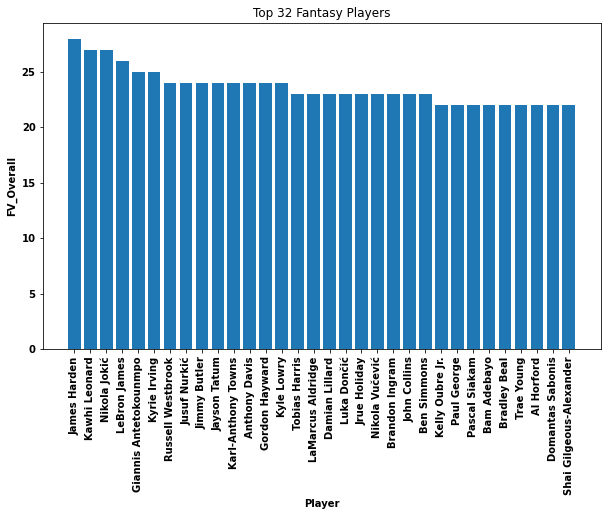

In [64]:
#create bar chart
plt.figure(figsize = (10, 6))
plt.xlabel('Player')
plt.ylabel('FV_Overall')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.title('Top 32 Fantasy Players')
plt.xticks(rotation=90)
plt.bar(x, y)